# HW3- Scanpy Clustering Exercise

In [10]:
# check scanpy first 

import scanpy #or import scanpy as sc

# if you got the error, then dowloand the scanpy:
!pip install scanpy

import anndata
import scipy 
import time
t0start = time.time()

import pandas
import numpy
import os
import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70
# plt.style.use('dark_background')

import seaborn as sns

from sklearn.decomposition import PCA

# Load in the COVID single cell sequencing dataset 

In [2]:
# Define and load the h5ad data file
file_path = 'Lethal_COVID_Data_AllCells.h5ad'
if 1:  
    t0 = time.time()
    adata = scanpy.read(file_path)
    print('%.1f'%(-t0+time.time()), ' seconds passed' )
    print(type(adata.X))
    adata
    
# Check the time for seeing hpw many second passed whike loading this h5ad data file

2.7  seconds passed
<class 'scipy.sparse._csr.csr_matrix'>


In [3]:
adata

AnnData object with n_obs × n_vars = 116313 × 34546
    obs: 'disease__ontology_label', 'Cell type', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'group', 'cell_type_intermediate', 'cell_type_fine', 'initial_clustering', 'age', 'sex', 'recorded_race', 'recorded_ethnicity', 'intubation_days', 'interval_death_symptoms_onset_days', 'pmi_h'
    uns: 'Brief Info', 'Cancer Cells', 'Cell Count', 'Cell type', 'Comment', 'Counts or preprocessing', 'First author', 'GSE', 'Last author', 'Link', 'Organism', 'Paper Link', 'Paper Title', 'Source', 'Technology', 'Year'

In [4]:
print(adata.obs['Cell type'].unique())
# Examine the cell types

['Epithelial cells', 'T cells', 'Fibroblasts', 'Myeloid', 'Neuronal cells', 'B cells', 'APC-like', 'Endothelial cells', 'Mast cells']
Categories (9, object): ['APC-like', 'B cells', 'Endothelial cells', 'Epithelial cells', ..., 'Mast cells', 'Myeloid', 'Neuronal cells', 'T cells']


In [5]:
print('Look at count matrix. We see integers - that confirms - data are raw-counts, not preprocessed expressions')
print(adata.X.sum(), type(adata.X), numpy.asarray(adata.X.sum(axis = 1)).ravel()[:10])
scanpy.pp.calculate_qc_metrics(adata,  percent_top=None, log1p=False, inplace=True)
    # Calculates statistics on both cells and genes:
    # for cells: 'n_genes_by_counts', 'total_counts'
    # for genes: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    # If parameter: inplace = True, then these statistics will be added to adata_EC

Look at count matrix. We see integers - that confirms - data are raw-counts, not preprocessed expressions
174998000.0 <class 'scipy.sparse._csr.csr_matrix'> [17690. 13828. 12490. 12304. 11976. 11331. 10404. 10442.  9804.  9332.]


# Filtering data and preprocessing


In [6]:
# We are going to normalise the data. Let's make sure we can still access the original (raw) data
adata
adata.raw = adata

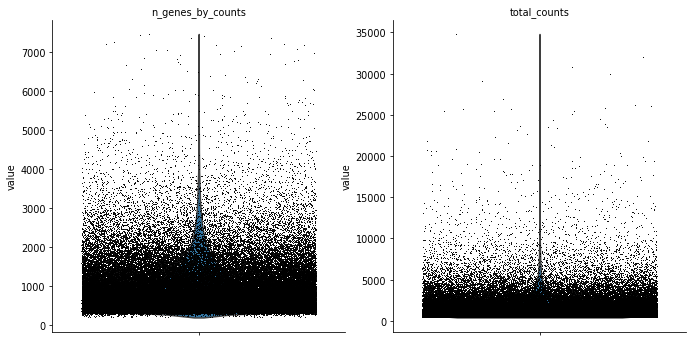

In [7]:
scanpy.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True)

***You should really read the comments in this python code, and understand what the code is doing.***

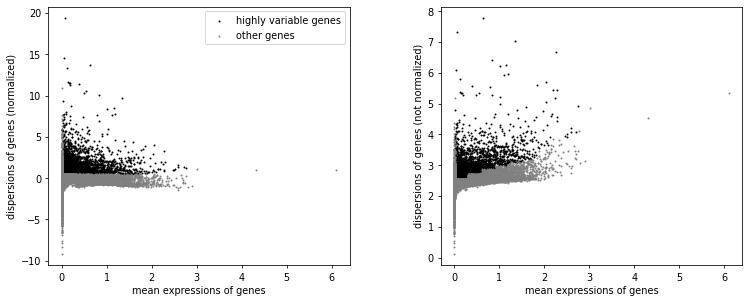

/Users/melike/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 116313 × 3686
    obs: 'disease__ontology_label', 'Cell type', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'group', 'cell_type_intermediate', 'cell_type_fine', 'initial_clustering', 'age', 'sex', 'recorded_race', 'recorded_ethnicity', 'intubation_days', 'interval_death_symptoms_onset_days', 'pmi_h', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Brief Info', 'Cancer Cells', 'Cell Count', 'Cell type', 'Comment', 'Counts or preprocessing', 'First author', 'GSE', 'Last author', 'Link', 'Organism', 'Paper Link', 'Paper Title', 'Source', 'Technology', 'Year', 'log1p', 'hvg'

In [8]:
scanpy.pp.filter_cells(adata, min_genes=200) # Remove cells with more than 200 and less than 8000 detected genes
scanpy.pp.filter_cells(adata, max_genes=8000) # Remove cells with more than 200 and less than 8000 detected genes

scanpy.pp.filter_genes(adata, min_cells=3) # Remove genes detected in less than 3 cells
adata
#if 0: 
#    # Remove cells with less than 5000 counts
#    adata = adata[adata.obs.n_genes_by_counts <5000, :]    
#    adata
    
scanpy.pp.normalize_total(adata, target_sum=1e4) # normalize with counts per million
scanpy.pp.log1p(adata) #take the log(1+x) of each value

if 0:
    # sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    sc.pp.regress_out(adata, ['total_counts'])

scanpy.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
scanpy.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]

scanpy.pp.scale(adata, max_value=10) # subtract the mean expression value and divide by the standard deviation
adata

### Clustering

In [23]:
# UMAP
# Explain these codes.
scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
scanpy.tl.umap(adata)

## Exercise 1:  Visualize the clusters on your UMAP representation.
First graph should show n_genes_by_counts. 
Second graph should show total_counts

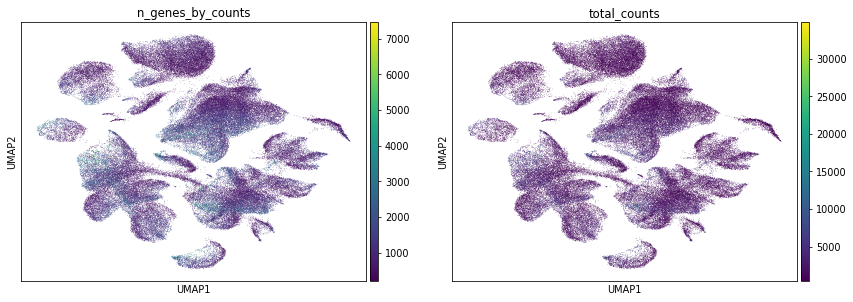

In [24]:
#Answer1 code 

## Exercise 2 : Lets see if we can identify different types of cell.  Visualize the cell types on your UMAP representation.

/Users/melike/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


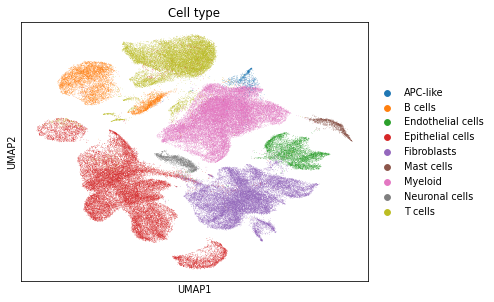

In [25]:
#Answer2 code 

#### We found a lot of cell types.But what if I am only interested in Myeloid cells (pink ones)? 

## Exercise 3 : Lets see if we can highlight only Myeloid cells.  Visualize only Myeloid cells on your UMAP representation.

/Users/melike/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


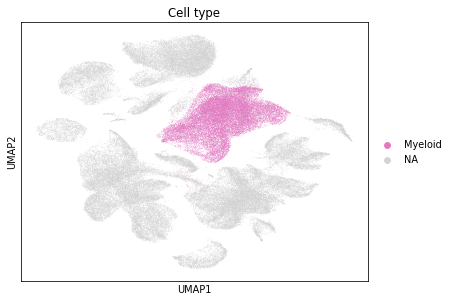

In [30]:
#Answer3 code 

In [ ]:
Congrats! You are Scanpy-pro!